# Number of Parameters vs Generalization

In [1]:
### Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device", device)

Device cuda


In [3]:
class model_class(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes=None):
        super(model_class, self).__init__()

        # Store model architecture parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes or []

        # Create layers
        layers = []
        in_features = input_size
        for h_size in hidden_sizes:
            layers.append(nn.Linear(in_features, h_size))
            layers.append(nn.ReLU())  # Add activation after each hidden layer
            in_features = h_size
        layers.append(nn.Linear(in_features, output_size))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        # Forward pass through the layers
        x = x.view(-1, 784)
        for layer in self.layers:
            x = layer(x)
        return x

In [4]:
### training function for MNIST data set
def train_eval(model, num_epochs, learning_rate, train_loader, test_loader):
    # model to device
    model = model.to(device)
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Training loop
    total_loss = []
    total_accuracy = []
    for epoch in range(num_epochs):
        train_loss = 0.0

        #Training
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            #print(images.shape, labels.shape)

            # Zero out Gradient
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            train_loss += loss * images.size(0)

        train_loss = train_loss/len(train_loader.sampler)
        total_loss.append(train_loss)

        #Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        total_accuracy.append(accuracy)
        
        print(f"Epoch {epoch}; loss: {total_loss[-1]}")
    return total_loss[-1], total_accuracy[-1]

In [5]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [6]:
model1 = model_class(input_size = 784, output_size = 10, hidden_sizes = [8,16])
model2 = model_class(input_size = 784, output_size = 10, hidden_sizes = [16,32])
model3 = model_class(input_size = 784, output_size = 10, hidden_sizes = [32,32])
model4 = model_class(input_size = 784, output_size = 10, hidden_sizes = [32,64])
model5 = model_class(input_size = 784, output_size = 10, hidden_sizes = [64,64])
model6 = model_class(input_size = 784, output_size = 10, hidden_sizes = [64,128])
model7 = model_class(input_size = 784, output_size = 10, hidden_sizes = [128,128])
model8 = model_class(input_size = 784, output_size = 10, hidden_sizes = [128,256])
model9 = model_class(input_size = 784, output_size = 10, hidden_sizes = [256,256])
model10 = model_class(input_size = 784, output_size = 10, hidden_sizes = [32,128])
model11 = model_class(input_size = 784, output_size = 10, hidden_sizes = [8,256])

In [7]:
m1_loss, m1_acc = train_eval(model1, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m2_loss, m2_acc = train_eval(model2, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m3_loss, m3_acc = train_eval(model3, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m4_loss, m4_acc = train_eval(model4, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m5_loss, m5_acc = train_eval(model5, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m6_loss, m6_acc = train_eval(model6, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m7_loss, m7_acc = train_eval(model7, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m8_loss, m8_acc = train_eval(model8, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m9_loss, m9_acc = train_eval(model9, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m10_loss, m10_acc = train_eval(model10, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)
m11_loss, m11_acc = train_eval(model11, num_epochs=10, learning_rate=0.001, train_loader=train_loader
                             , test_loader=test_loader)

Epoch 0; loss: 0.5425700545310974
Epoch 1; loss: 0.31043797731399536
Epoch 2; loss: 0.28325098752975464
Epoch 3; loss: 0.2673490047454834
Epoch 4; loss: 0.2545187771320343
Epoch 5; loss: 0.2451334297657013
Epoch 6; loss: 0.23561310768127441
Epoch 7; loss: 0.2290806621313095
Epoch 8; loss: 0.22219085693359375
Epoch 9; loss: 0.2163500189781189
Epoch 0; loss: 0.455471396446228
Epoch 1; loss: 0.240642249584198
Epoch 2; loss: 0.19513176381587982
Epoch 3; loss: 0.16734640300273895
Epoch 4; loss: 0.15077650547027588
Epoch 5; loss: 0.13901448249816895
Epoch 6; loss: 0.12807880342006683
Epoch 7; loss: 0.12229415029287338
Epoch 8; loss: 0.11538770794868469
Epoch 9; loss: 0.10917337238788605
Epoch 0; loss: 0.41517260670661926
Epoch 1; loss: 0.2046314924955368
Epoch 2; loss: 0.15645718574523926
Epoch 3; loss: 0.13294094800949097
Epoch 4; loss: 0.11476583033800125
Epoch 5; loss: 0.10128820687532425
Epoch 6; loss: 0.09110693633556366
Epoch 7; loss: 0.08325100690126419
Epoch 8; loss: 0.07473465800285

In [8]:
print(f"loss: {m1_loss}; accuracy: {m1_acc}")

loss: 0.2163500189781189; accuracy: 93.28


In [9]:
loss_vec = [m1_loss,m2_loss,m3_loss,m4_loss,m5_loss,m6_loss,m7_loss,m8_loss,m9_loss,m10_loss,m11_loss]
loss_vec = np.array([x.detach().cpu().numpy() for x in loss_vec])
acc_vec = np.array([m1_acc,m2_acc,m3_acc,m4_acc,m5_acc,m6_acc,m7_acc,m8_acc,m9_acc,m10_acc,m11_acc])

In [10]:
models = [model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11]
parameters = []
for model in models:
    parameters.append(np.array(sum(p.numel() for p in model.parameters())))
parameters = np.array(parameters)
parameters

array([  6594,  13434,  26506,  27882,  55050,  59850, 118282, 136074,
       269322,  30634,  11154])

In [11]:
loss_vec

array([0.21635002, 0.10917337, 0.06889715, 0.05344696, 0.02942842,
       0.0278209 , 0.01997818, 0.02056673, 0.01706557, 0.04357763,
       0.14242703], dtype=float32)

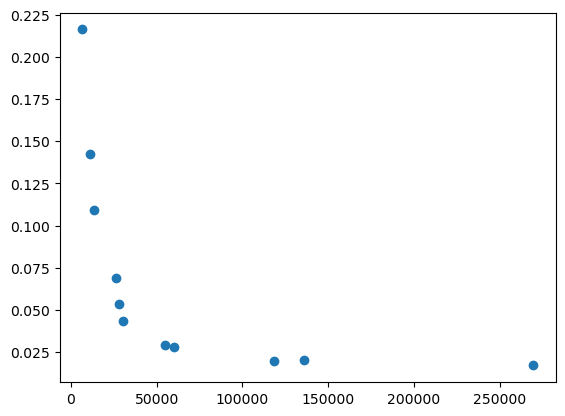

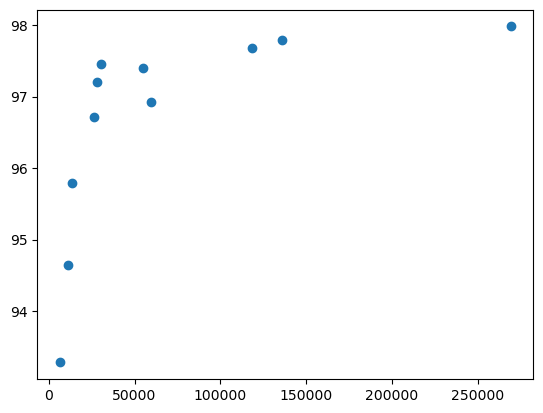

In [12]:
plt.scatter(parameters, loss_vec)
plt.show()
plt.scatter(parameters, acc_vec)
plt.show()

In [13]:
#Validation
test_acc_vec = []
for model in models:
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_acc_vec.append(accuracy)

In [14]:
#Validation
train_acc_vec = []
for model in models:
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    train_acc_vec.append(accuracy)

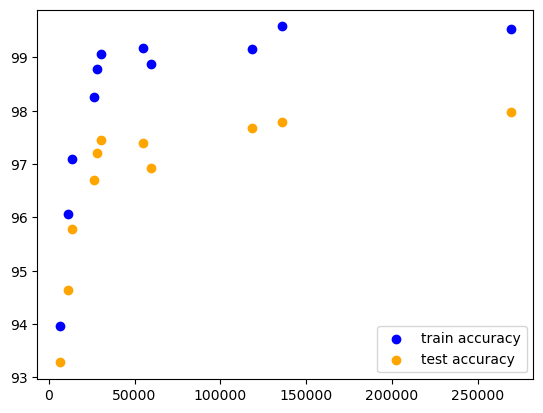

In [15]:
plt.scatter(parameters, train_acc_vec,  c = "blue", label = "train accuracy")
plt.scatter(parameters, test_acc_vec, c = "orange", label = "test accuracy")
plt.legend()
plt.savefig("param_acc.png")
plt.show()

In [16]:
criterion = nn.CrossEntropyLoss()
train_loss_vec = []
for model in models:
    train_loss = 0.0

    #Training
    model.eval()
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            #print(images.shape, labels.shape)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            train_loss += loss * images.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    train_loss_vec.append(train_loss)

In [17]:
criterion = nn.CrossEntropyLoss()
test_loss_vec = []
for model in models:
    test_loss = 0.0

    #Training
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            #print(images.shape, labels.shape)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss * images.size(0)

    test_loss = test_loss/len(test_loader.sampler)
    test_loss_vec.append(test_loss)

In [18]:
train_loss_vec = np.array([x.detach().cpu().numpy() for x in train_loss_vec])
test_loss_vec = np.array([x.detach().cpu().numpy() for x in test_loss_vec])

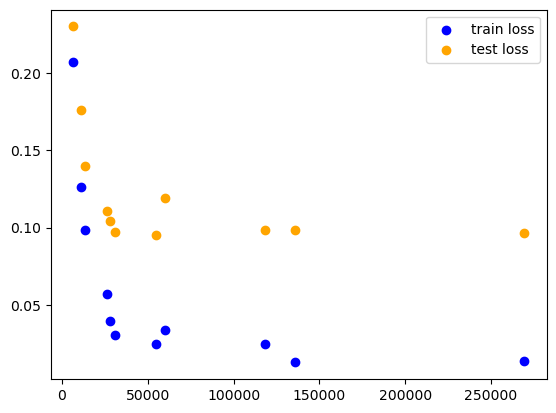

In [19]:
plt.scatter(parameters, train_loss_vec,  c = "blue", label = "train loss")
plt.scatter(parameters, test_loss_vec, c = "orange", label = "test loss")
plt.legend()
plt.savefig("param_loss.png")
plt.show()